In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import pandas as pd

# Будем использовать beta-распределение 
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html#scipy.stats.beta)

In [2]:
# параметры для beta-распределения
a, b = 2.31, 0.627

# сгенерируем 1000 элементов из beta-распределения
y = sts.beta.rvs(a, b, size=1000)

# теоретический вид бета-распределения
x = np.linspace(0, 2, 100)
theoretical = sts.beta.pdf(x, a, b)

Text(0.5, 0, '$x$')

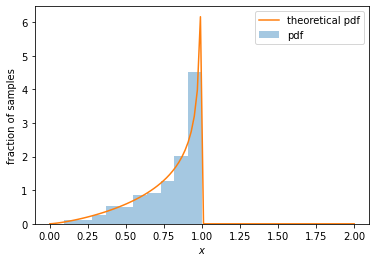

In [3]:
# построим график
plt.hist(y, density=True, histtype='stepfilled', alpha=0.4, label='pdf')
plt.plot(x, theoretical, label='theoretical pdf')
plt.legend(loc='best')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

### Оценим распределение выборочного среднего случайной величины при разных объемах выборок

In [4]:
# функция для отображения распределения выборочного среднего 
# size -> кол-во выборок 
# number -> объем одной выборки
def plot(size, number, a, b):
    # посчитаем значения среднего выборочного
    res = [sum(sts.beta.rvs(a, b, size=number)) / number for _ in range(0, size)]
    
    plt.hist(res, density=True, histtype='stepfilled', alpha=0.4)
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    
    # найдем мат.ожидание
    mx = sum(res) / size
    # найдем дисперсию
    dx = sum((i - mx) ** 2 for i in res) / size
    x = np.linspace(0.5, 1, 100)
    plt.plot(x, sts.norm.pdf(x, mx, dx ** 0.5))
             

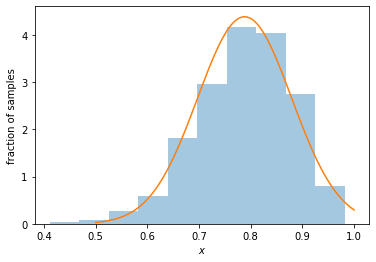

In [5]:
# график для 1000 выорок размером 5
plot(1000, 5, a, b)

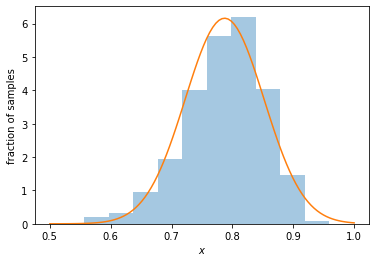

In [6]:
# график для 1000 выорок размером 10
plot(1000, 10, a, b)

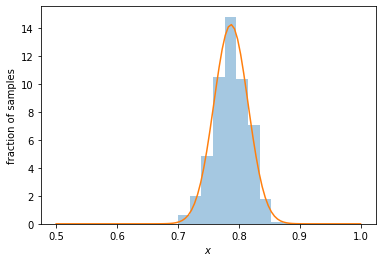

In [7]:
# график для 1000 выорок размером 50
plot(1000, 50, a, b)

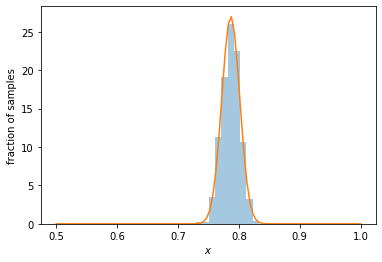

In [8]:
# график для 1000 выорок размером 200
plot(1000, 200, a, b)

# Выводы

Как можем видеть из графиков, чем больше выборка из бета-распределения, тем лучше 
распределение ее выборочных средних напоминает нормальное (а точнее тем лучше оно им аппроксимируется). 

При малых значениях выборки эта апроксимация достаточно не точная (исходное распределение немного смещено относительно теоретического нормального), а при значениях > 30, нормальное
распределение аппроксимирует уже хорошо.

С увеличением размера выборки, аппроксимация улучшается.